Epoch 0, Loss: 0.153931556742151
Epoch 100, Loss: 0.11544083572129256
Epoch 200, Loss: 0.08101965904180114
Epoch 300, Loss: 0.05503522141435849
Epoch 400, Loss: 0.03740849394794035
Epoch 500, Loss: 0.025939685421194417
Epoch 600, Loss: 0.018476455661781493
Epoch 700, Loss: 0.0135221404635988
Epoch 800, Loss: 0.010144292711642971
Epoch 900, Loss: 0.007777383138510155
Training complete!
Updated weights and biases:
Weights Input-Hidden:
 [[ 0.35378075  0.97165246  0.686632    0.60138425]
 [ 0.0522218   0.2606853  -0.16872609  0.87980496]]
Biases Hidden:
 [[-0.04151874  0.04187631 -0.09072388  0.00545153]]
Weights Hidden-Output:
 [[ 0.25019473  0.76817762]
 [-0.40912059  1.0447438 ]
 [ 0.5163221   0.26565693]
 [-0.36301449  0.27763433]]
Biases Output:
 [[-0.59095276  0.10217147]]


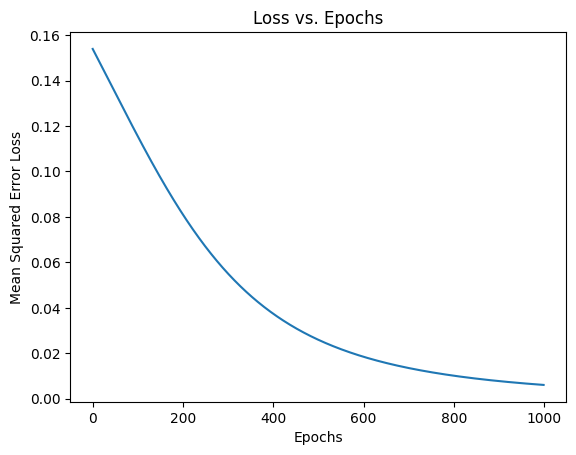

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Function to initialize weights and biases
def initialize_parameters(input_size, hidden_size, output_size):
    np.random.seed(42)
    weights_input_hidden = np.random.rand(input_size, hidden_size)
    biases_hidden = np.zeros((1, hidden_size))
    weights_hidden_output = np.random.rand(hidden_size, output_size)
    biases_output = np.zeros((1, output_size))

    return weights_input_hidden, biases_hidden, weights_hidden_output, biases_output

# Function to calculate the output of the neural network
def forward_propagation(X, weights_input_hidden, biases_hidden, weights_hidden_output, biases_output):
    hidden_layer_input = np.dot(X, weights_input_hidden) + biases_hidden
    hidden_layer_output = 1 / (1 + np.exp(-hidden_layer_input))  # Sigmoid activation function
    output_layer_input = np.dot(hidden_layer_output, weights_hidden_output) + biases_output
    predicted_output = 1 / (1 + np.exp(-output_layer_input))  # Sigmoid activation function

    return hidden_layer_output, predicted_output

# Function to calculate the mean squared error loss
def calculate_loss(Y_true, Y_pred):
    return np.mean((Y_true - Y_pred) ** 2)

# Function to perform mini-batch gradient descent
def mini_batch_gradient_descent(X, Y, learning_rate, batch_size, epochs):
    input_size = X.shape[1]
    hidden_size = 4  # You can adjust the number of hidden units
    output_size = Y.shape[1]

    # Initialize parameters
    weights_input_hidden, biases_hidden, weights_hidden_output, biases_output = initialize_parameters(input_size, hidden_size, output_size)

    # Store loss for plotting
    losses = []

    for epoch in range(epochs):
        # Shuffle the data for each epoch
        indices = np.arange(X.shape[0])
        np.random.shuffle(indices)
        X_shuffled = X[indices]
        Y_shuffled = Y[indices]

        # Mini-batch gradient descent
        for i in range(0, X.shape[0], batch_size):
            X_batch = X_shuffled[i:i + batch_size]
            Y_batch = Y_shuffled[i:i + batch_size]

            # Forward propagation
            hidden_layer_output, predicted_output = forward_propagation(X_batch, weights_input_hidden, biases_hidden, weights_hidden_output, biases_output)

            # Backpropagation
            error = Y_batch - predicted_output
            output_delta = error * (predicted_output * (1 - predicted_output))
            hidden_layer_delta = output_delta.dot(weights_hidden_output.T) * (hidden_layer_output * (1 - hidden_layer_output))

            # Update weights and biases
            weights_input_hidden += learning_rate * X_batch.T.dot(hidden_layer_delta)
            biases_hidden += learning_rate * np.sum(hidden_layer_delta, axis=0, keepdims=True)
            weights_hidden_output += learning_rate * hidden_layer_output.T.dot(output_delta)
            biases_output += learning_rate * np.sum(output_delta, axis=0, keepdims=True)

        # Calculate and store loss for each epoch
        loss = calculate_loss(Y, forward_propagation(X, weights_input_hidden, biases_hidden, weights_hidden_output, biases_output)[1])
        losses.append(loss)

        if epoch % 100 == 0:
            print(f"Epoch {epoch}, Loss: {loss}")

    print("Training complete!")

    # Display updated weights and biases
    print("Updated weights and biases:")
    print("Weights Input-Hidden:\n", weights_input_hidden)
    print("Biases Hidden:\n", biases_hidden)
    print("Weights Hidden-Output:\n", weights_hidden_output)
    print("Biases Output:\n", biases_output)

    # Plot loss w.r.t. epoch
    plt.plot(range(epochs), losses)
    plt.xlabel('Epochs')
    plt.ylabel('Mean Squared Error Loss')
    plt.title('Loss vs. Epochs')
    plt.show()

# Dataset
X = np.array([[0.5, 2.5]])
Y = np.array([[0.2, 0.9]])

# Hyperparameters
learning_rate = 0.01
batch_size = 1  # Mini-batch size
epochs = 1000

# Perform mini-batch gradient descent
mini_batch_gradient_descent(X, Y, learning_rate, batch_size, epochs)
